In [22]:
'''We are going to take a dark image and try to improve it using various image processing methods'''

import cv2
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

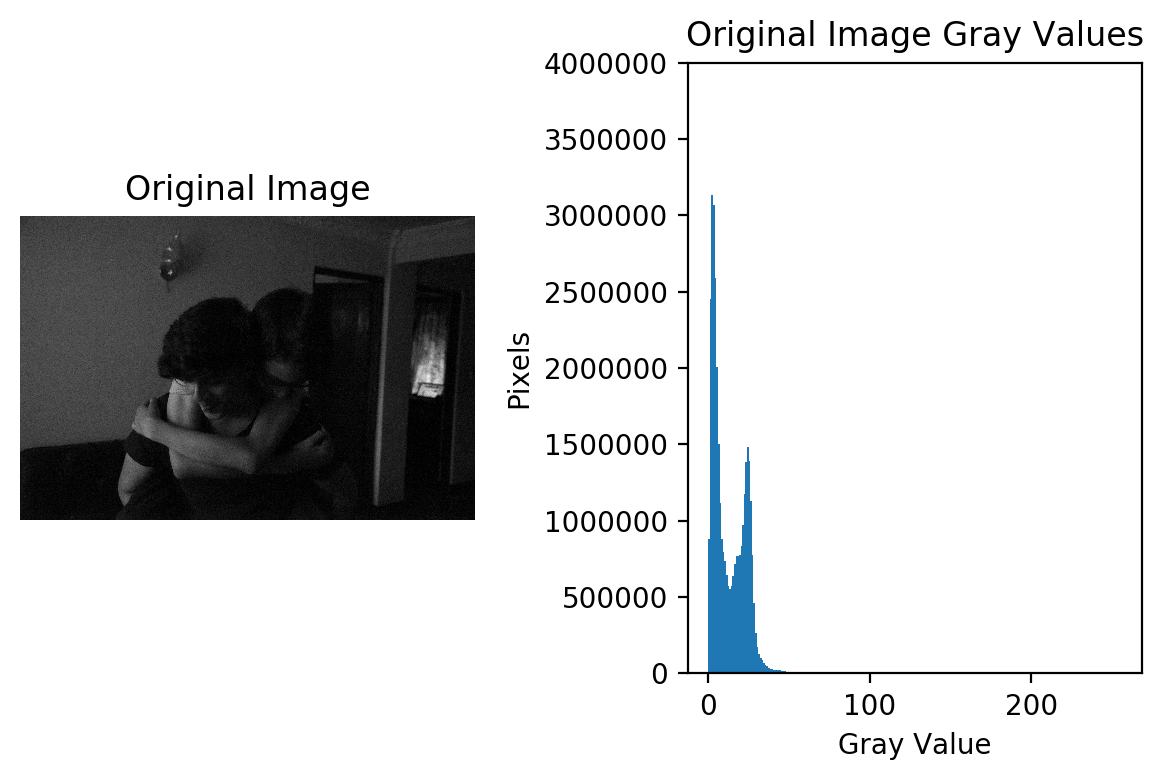

In [14]:
'''First, we will read in the original image, convert it gray and have a look at the image and its histogram'''

original_color = cv2.imread('back.jpg', cv2.IMREAD_COLOR)
original_img = cv2.cvtColor(original_color, cv2.COLOR_BGR2GRAY)

## Showing the original grayscale image
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

## Plotting the original contrast histogram
plt.subplot(1, 2, 2)
plt.hist(original_img.ravel(), bins=256, range=[0,256])
plt.title("Original Image Gray Values")
plt.ylim(top=4 * 10**6)
plt.xlabel('Gray Value')
plt.ylabel('Pixels')

plt.tight_layout()
plt.show()

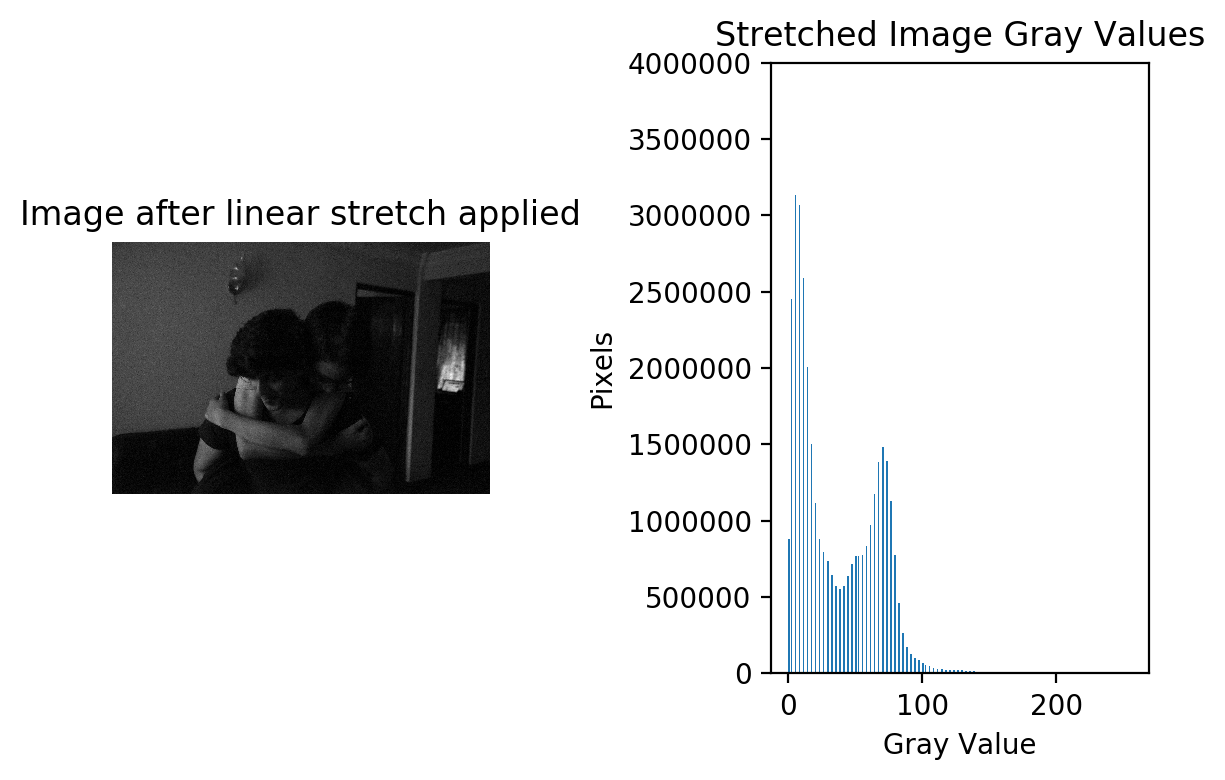

In [16]:
'''As we can see, the gray values are all leaning to the darker regions
We will now attempt to correct this by using a simple linear stretch that preserves
histogram shape while spreading out the values within a given range'''

def linear_stretch(img, out_min, out_max):
    
    in_min = np.amin(img)
    in_max = np.amax(img)
    
    gradient = (out_max - out_min) / (in_max - in_min)
    linear_transform = lambda x : ((gradient * x) + out_min)
    transform_fn = np.vectorize(linear_transform)
    
    return transform_fn(img).astype('uint8')

stretched_img = linear_stretch(original_img, 0, 256)

plt.subplot(1, 2, 1)
plt.imshow(stretched_img, cmap="gray")
plt.title("Image after linear stretch applied")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(stretched_img.ravel(), bins=256, range=[0, 256])
plt.title("Stretched Image Gray Values")
plt.ylim(top=4 * 10**6)
plt.xlabel('Gray Value')
plt.ylabel('Pixels')

plt.tight_layout()
plt.show()

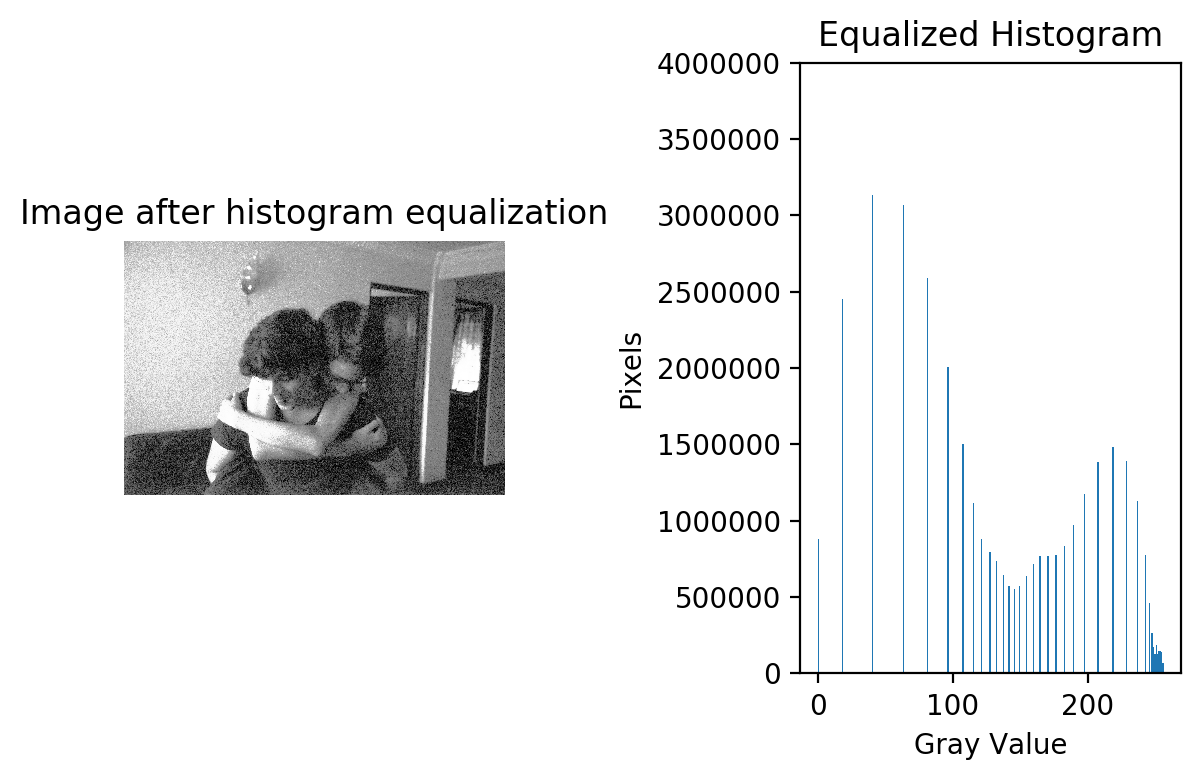

In [18]:
'''Linear stretch has not really improved contrast and gray values are still stacked towards blacks,
let us try historgram equalization'''

equalized_img = cv2.equalizeHist(stretched_img)

plt.subplot(1, 2, 1)
plt.imshow(equalized_img, cmap="gray")
plt.title("Image after histogram equalization")
plt.axis("off")

plt.subplot(1, 2, 2)
equalized_hist = plt.hist(equalized_img.ravel(), bins=256, range=[0, 256])
plt.title("Equalized Histogram")
plt.ylim(top=4*10**6)
plt.xlabel("Gray Value")
plt.ylabel("Pixels")

plt.tight_layout()
plt.show()

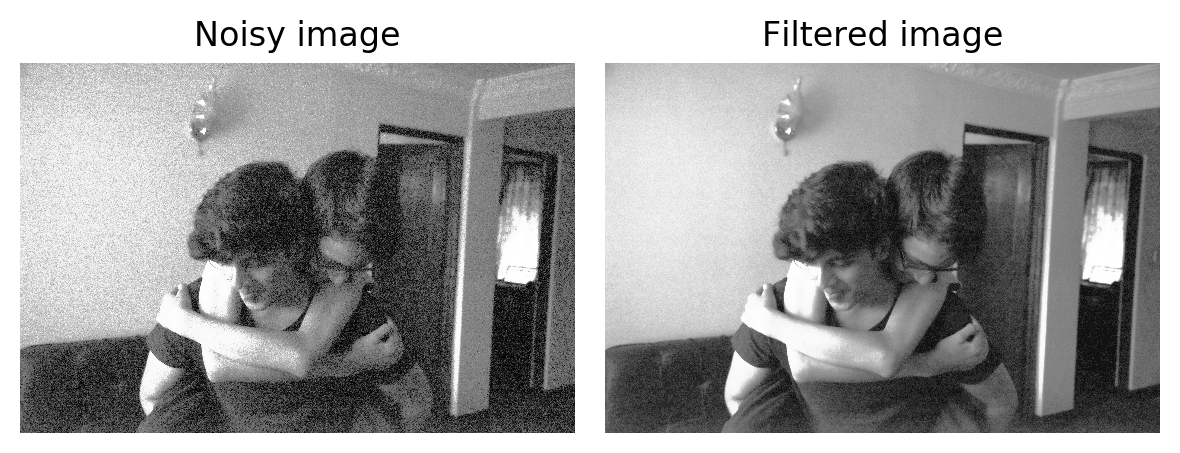

In [19]:
'''Some salt and pepper noise has been added by equalizing the stretched image,
we will try and fix that by first using a median blur'''

filtered_img = cv2.medianBlur(equalized_img, 9)

plt.subplot(1, 2, 1)
plt.imshow(equalized_img, cmap='gray')
plt.title("Noisy image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title("Filtered image")
plt.axis("off")

plt.tight_layout()
plt.show()

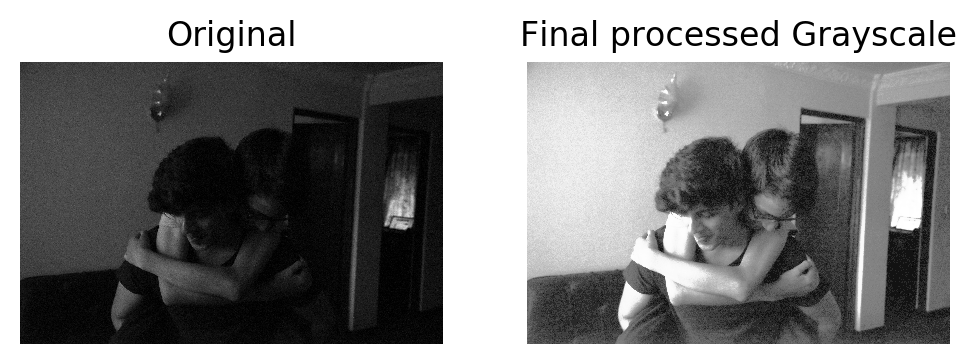

In [20]:
'''For this run, we will stop with this image, where the actual content 
is now visible'''

## Giving a final comparison between original and processed image
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title("Final processed Grayscale")
plt.axis("off")

plt.tight_layout
plt.show()

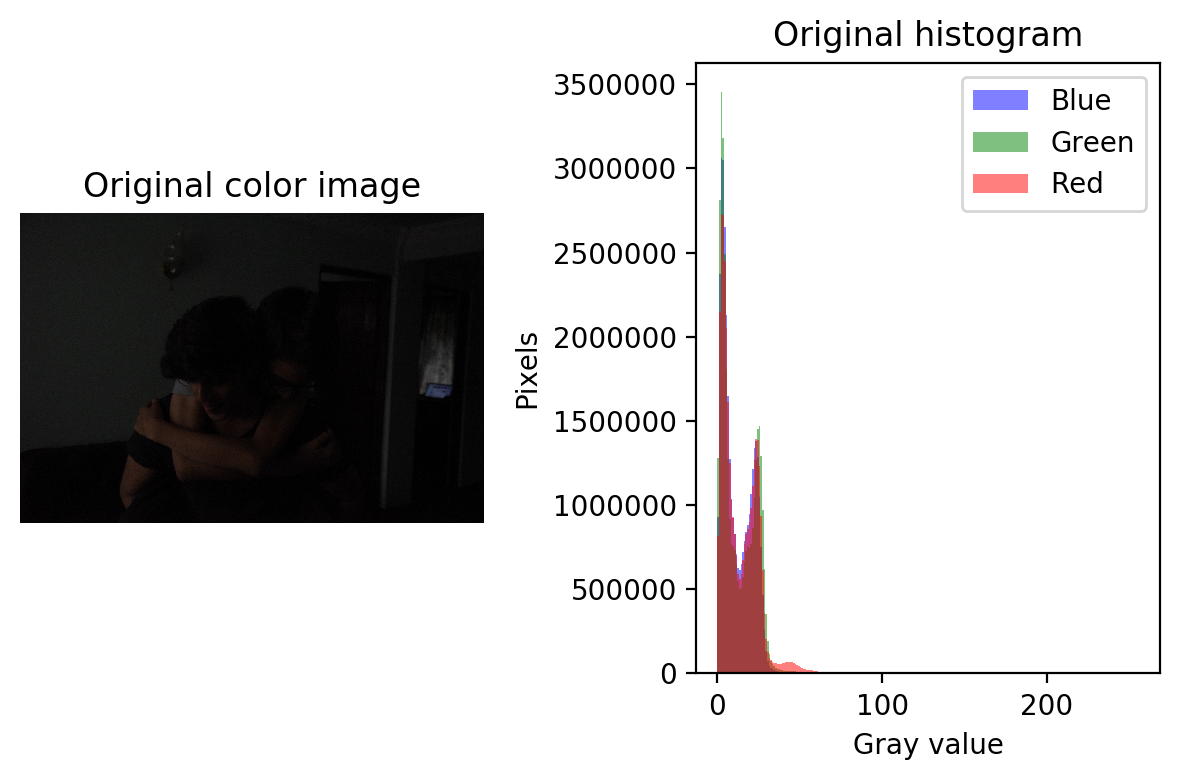

In [23]:
'''Expanding on the grayscale version of this image, I will now see what happens
if the individual colored layers of this image are equalized then put back together'''

original_b, original_g, original_r = cv2.split(original_color)
original_rgb = cv2.cvtColor(original_color, cv2.COLOR_BGR2RGB)

## Displaying the original color image
plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Original color image")
plt.axis("off")

## A histogram of the different RGB values 
plt.subplot(1, 2, 2)
plt.hist(original_b.ravel(), bins=256, range=[0, 256], alpha=0.5, color='b', label="Blue")
plt.hist(original_g.ravel(), bins=256, range=[0, 256], alpha=0.5, color = 'g', label="Green")
plt.hist(original_r.ravel(), bins=256, range=[0, 256], alpha=0.5, color='r', label="Red")
plt.legend(loc = 'upper right')
plt.title("Original histogram")
plt.xlabel("Gray value")
plt.ylabel("Pixels")

plt.tight_layout()
plt.show()

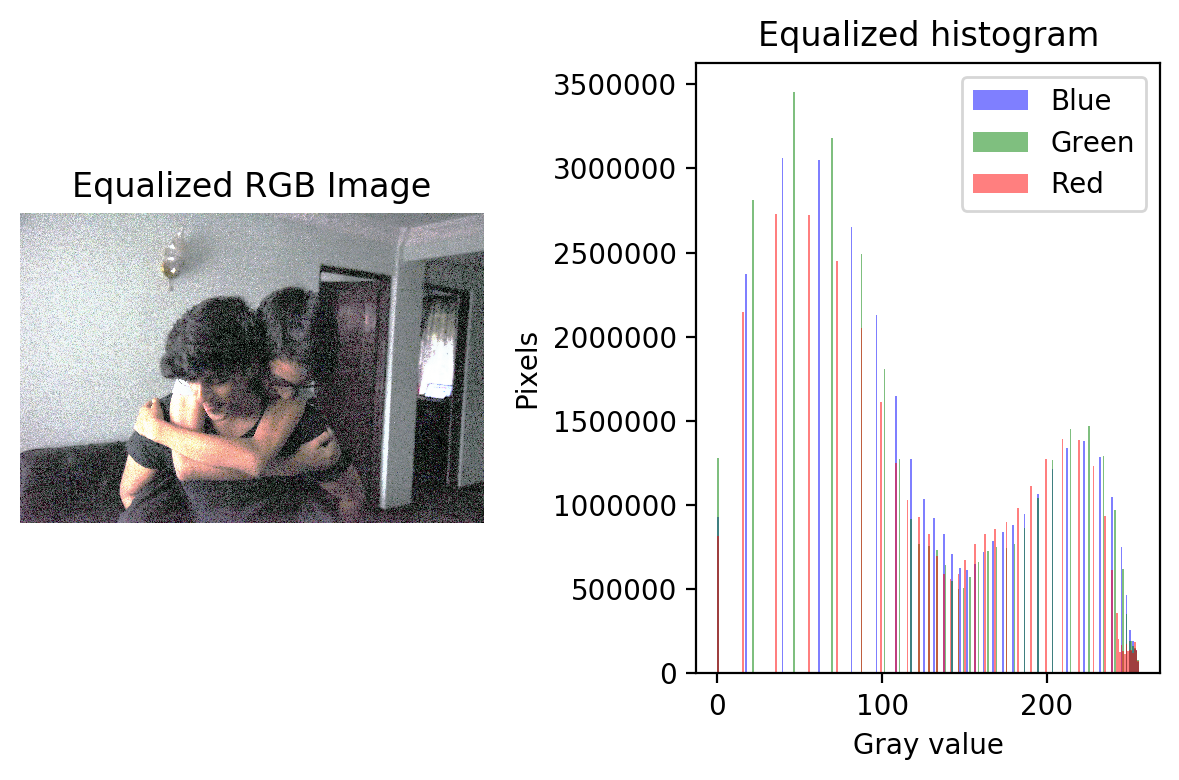

In [26]:
'''As we can see, the colors are all very dark, follow similar patterns. Equalization time'''
equalized_b = cv2.equalizeHist(original_b)
equalized_g = cv2.equalizeHist(original_g)
equalized_r = cv2.equalizeHist(original_r)

equalized_bgr = cv2.merge((equalized_b, equalized_g, equalized_r))
equalized_rgb = cv2.cvtColor(equalized_bgr, cv2.COLOR_BGR2RGB)

## Display the equalized rgb with histogram
plt.subplot(1, 2, 1)
plt.imshow(equalized_rgb)
plt.title("Equalized RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(equalized_b.ravel(), bins=256, range=[0, 256], alpha=0.5, color='b', label="Blue")
plt.hist(equalized_g.ravel(), bins=256, range=[0, 256], alpha=0.5, color = 'g', label="Green")
plt.hist(equalized_r.ravel(), bins=256, range=[0, 256], alpha=0.5, color='r', label="Red")
plt.legend(loc = 'upper right')
plt.title("Equalized histogram")
plt.xlabel("Gray value")
plt.ylabel("Pixels")

plt.tight_layout()
plt.show()

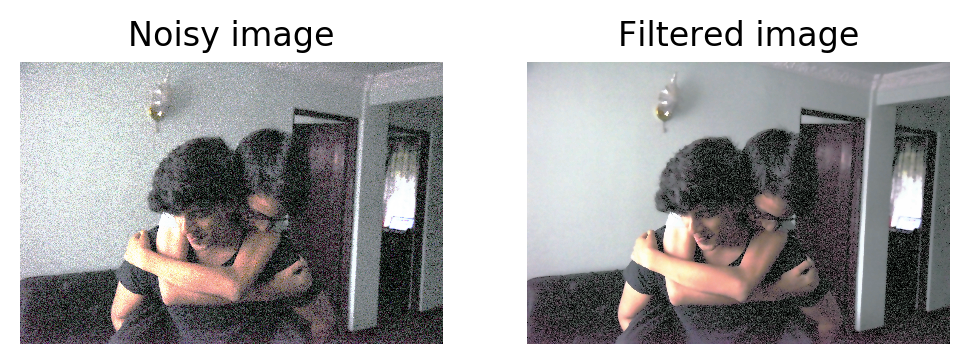

In [27]:
'''As with equalizing the grayscale image, we have some noise to remove'''

filtered_bgr = cv2.fastNlMeansDenoisingColored(equalized_bgr,None,15,15,9,41)
filtered_rgb = cv2.cvtColor(filtered_bgr, cv2.COLOR_BGR2RGB)

## Show original noisy image with filtered image
plt.subplot(1, 2, 1)
plt.imshow(equalized_rgb)
plt.title("Noisy image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(filtered_rgb)
plt.title("Filtered image")
plt.axis("off")

plt.show()

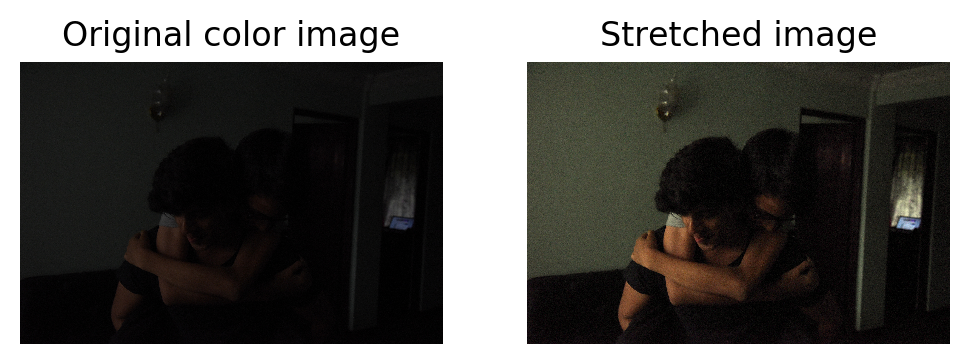

In [28]:
'''Equalization followed by filtering did produce something reasonable, but noise removal is suboptimal
Let us see what we can do by applying a linear stretch to each color channel'''

stretched_b = linear_stretch(original_b, 0, 255)
stretched_g = linear_stretch(original_g, 0, 255)
stretched_r = linear_stretch(original_r, 0, 255)

stretched_bgr = cv2.merge((stretched_b, stretched_g, stretched_r))
stretched_rgb = cv2.cvtColor(stretched_bgr, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Original color image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(stretched_rgb)
plt.title("Stretched image")
plt.axis("off")

plt.tight_layout
plt.show()

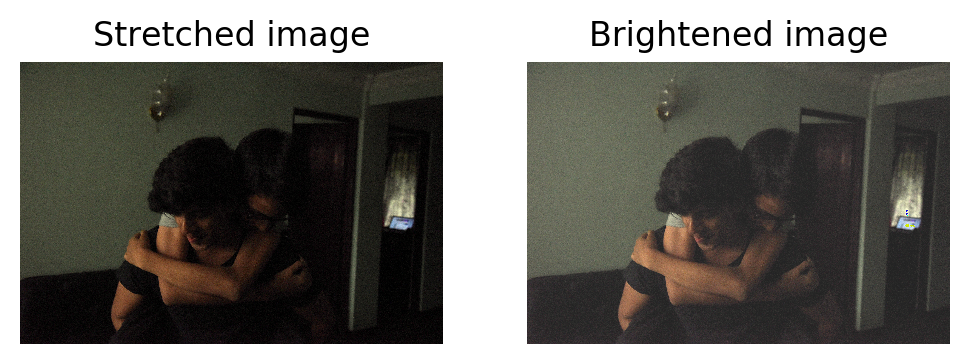

In [29]:
'''Results are promising, let us see if bumping the brightness just a tad can help'''

def brighten_by_value(img, value):
    brighten = lambda x: x + value
    brighten_fn = np.vectorize(brighten)
    
    return brighten_fn(img).astype('uint8')

brightened_image = brighten_by_value(stretched_rgb, 35)

plt.subplot(1, 2, 1)
plt.imshow(stretched_rgb)
plt.title("Stretched image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(brightened_image)
plt.title("Brightened image")
plt.axis("off")

plt.show()

In [33]:
'''Brightening seems to wash out the picture, and distort some color in the background.
In order to enhance dark regions, we will apply a gaussian blur then adjust the gamma for our stretched image'''

## Step 1: Applying a Gaussian blur to smooth noise evident in dark images
blurred_bgr = cv2.GaussianBlur(stretched_bgr, (7, 7), 0)
blurred_rgb = cv2.cvtColor(blurred_bgr, cv2.COLOR_BGR2RGB)

##Step 2: Gamma adjustment
def adjust_gamma(src_img, gamma=1.0):
    if gamma = 1.0:
        return src_img
    else:
        table = np.array([(i / 255.0)**(1 / gamma) for i in range(0, 256)]).astype('uint8')